# E-Commerce – EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('C:/Users/lenovo/Desktop/Python assignment/ecommerce.csv', encoding = 'ISO-8859-1')
#For non-unicode strings,one must decode from the native encoding (iso8859-1) to unicode, 
#then encode to a character set that can display the characters you wish, in this case I'd recommend UTF-8.

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [6]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


## 2. Check for missing values in all columns and replace them with the appropriate metric(Mean/Median/Mode)

In [8]:
df.isnull().sum()

invoice_num          0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
cust_id         135080
country              0
dtype: int64

In [9]:
df1=df.dropna()

In [10]:
df1.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In q.no2 the missing value present in the description column and customer id column
-->the description data type is string,so in this case we cant replace nan value with mean,median,mode.in that case we have to drop the nan value
-->the customer id data type is float,but it is more like unique key of customer, we cant take it as a numberic datatype so we cant replace nan value with mean,median,mode.in this case we have to drop the nan value.

data['cust_id'].mean()
data['cust_id'].replace(np.nan,mean)



data['description'].mean()
data['description'].replace(np.nan,mean)

In [11]:
df1.shape

(406829, 8)

In [12]:
df1['cust_id'] = df1['cust_id'].astype('int64')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   406829 non-null  object 
 1   stock_code    406829 non-null  object 
 2   description   406829 non-null  object 
 3   quantity      406829 non-null  int64  
 4   invoice_date  406829 non-null  object 
 5   unit_price    406829 non-null  float64
 6   cust_id       406829 non-null  int64  
 7   country       406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


## 3. Remove duplicate rows

In [14]:
df1.drop_duplicates(subset=None, keep="first", inplace=False)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [15]:
df1.shape

(406829, 8)


## 4. Remove rows which have negative values in Quantity column

In [16]:
df1.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [17]:
df2=df1[df1.quantity > 0]

In [18]:
df2.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


## 5. Add the columns - Month, Day and Hour for the invoice

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   397924 non-null  object 
 1   stock_code    397924 non-null  object 
 2   description   397924 non-null  object 
 3   quantity      397924 non-null  int64  
 4   invoice_date  397924 non-null  object 
 5   unit_price    397924 non-null  float64
 6   cust_id       397924 non-null  int64  
 7   country       397924 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.3+ MB


In [20]:
# change the invoice_date format - String to Timestamp format
df2['invoice_date']=pd.to_datetime(df2.invoice_date, format='%m/%d/%Y %H:%M')

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  object        
 1   stock_code    397924 non-null  object        
 2   description   397924 non-null  object        
 3   quantity      397924 non-null  int64         
 4   invoice_date  397924 non-null  datetime64[ns]
 5   unit_price    397924 non-null  float64       
 6   cust_id       397924 non-null  int64         
 7   country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [22]:
df2.insert(loc=5, column='month', value=df2.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df2.insert(loc=6, column='day', value=(df2.invoice_date.dt.dayofweek)+1)
df2.insert(loc=7, column='hour', value=df2.invoice_date.dt.hour)

In [23]:
df2.head()

,invoice_num,stock_code,description,quantity,invoice_date,month,day,hour,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,12,3,8,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,12,3,8,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,12,3,8,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,12,3,8,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,12,3,8,3.39,17850,United Kingdom


## 6. How many orders made by the customers?

In [25]:
df2.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


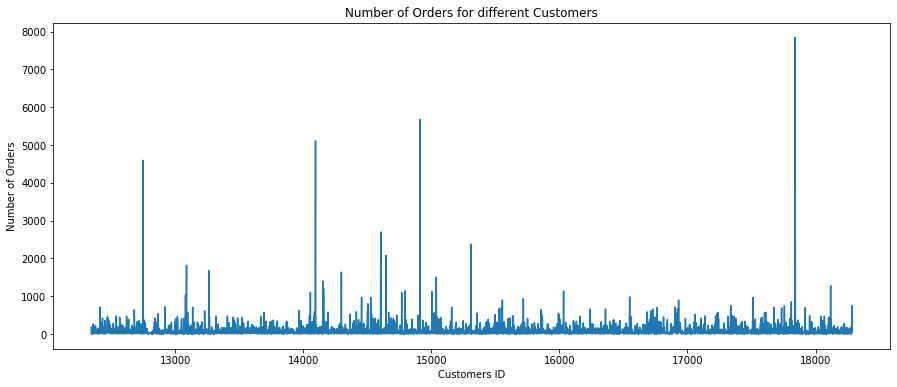

In [26]:
orders = df2.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

## 7. TOP 5 customers with higher number of orders

In [27]:
orders.sort_values(by='invoice_num', ascending=False).head()

,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


## 8. How much money spent by the customers?

In [28]:
df2['amount_spent'] = df2['quantity'] * df2['unit_price']

In [29]:
money_spent = df2.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()
money_spent.head()

#plt.subplots(figsize=(15,6))
#plt.plot(money_spent.cust_id, money_spent.amount_spent)
#plt.xlabel('Customers ID')
#plt.ylabel('Money spent (Dollar)')
#plt.title('Money Spent for different Customers')
#plt.show()

,cust_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40


## 9. TOP 5 customers with highest money spent

In [30]:
money_spent.sort_values(by='amount_spent', ascending=False).head()

,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


## 10. How many orders per month?

In [31]:
df2.insert(loc=2, column='year_month', value=df2['invoice_date'].map(lambda x: 100*x.year + x.month))


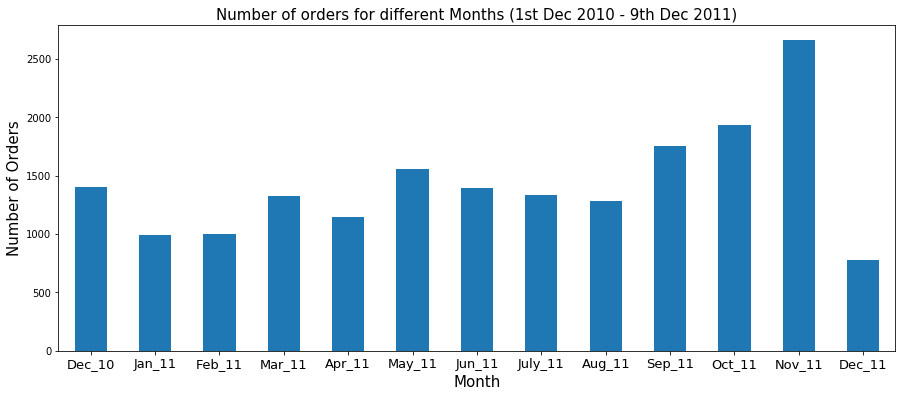

In [32]:
ax = df2.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## 11. How many orders per day?

In [37]:
df2.groupby('invoice_num')['day'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

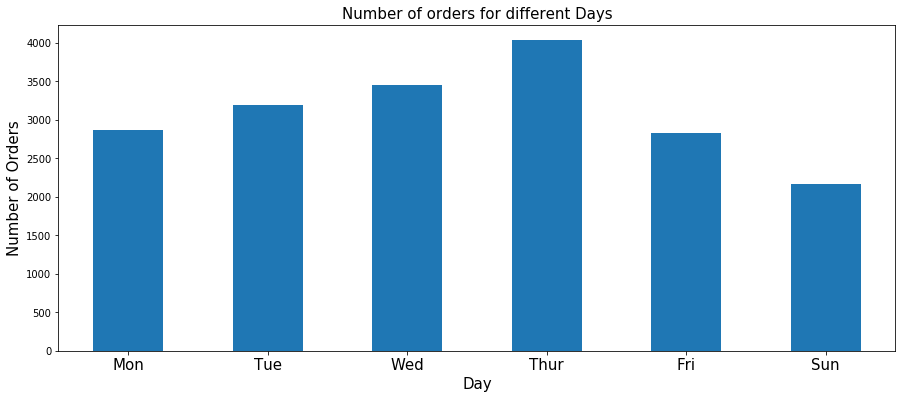

In [35]:
ax = df2.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

## 12. How many orders per hour?

In [36]:
df2.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

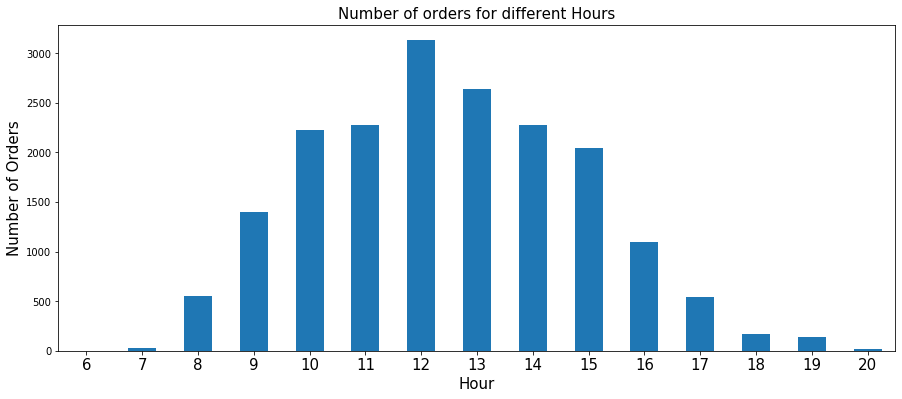

In [37]:
ax = df2.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

## 13. How many orders for each country?

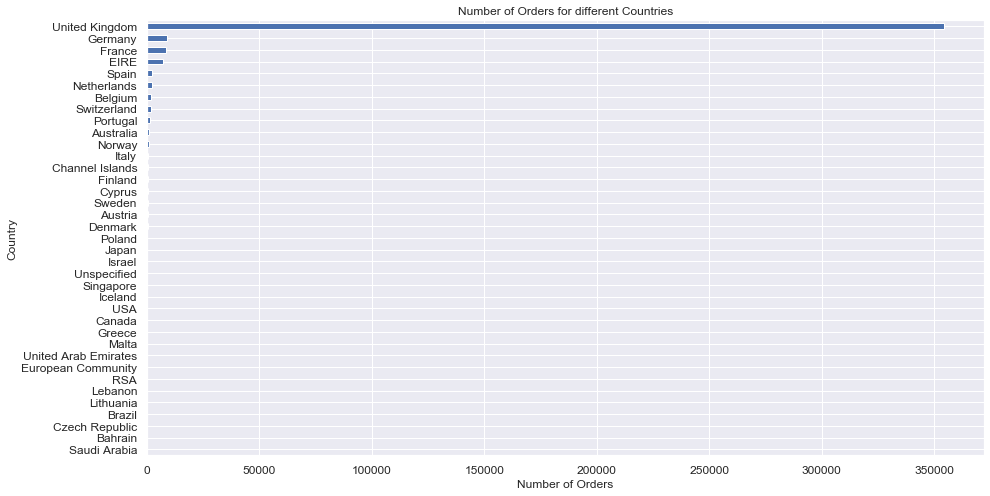

In [219]:
group_by_country = df2.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_by_country.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

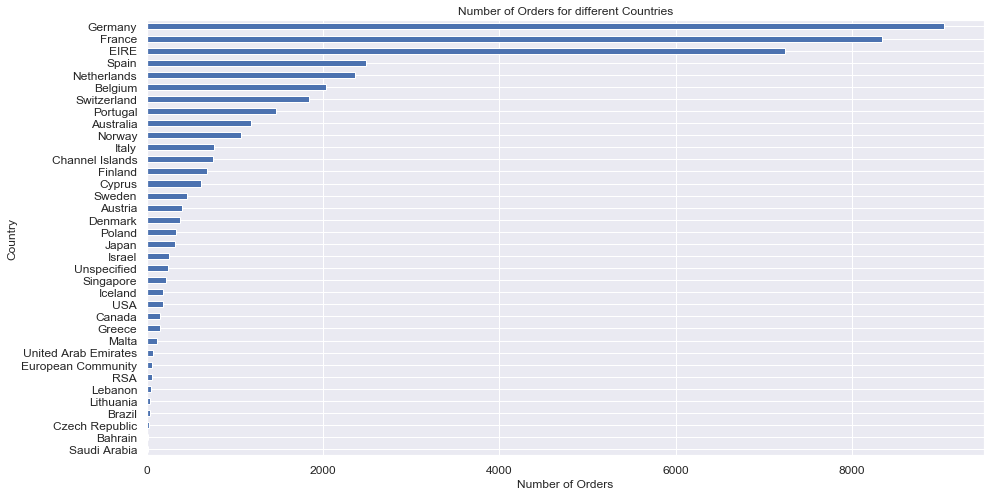

In [220]:
group_country_orders = df2.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

## 14. Orders trend across months

In [38]:
df_new = df2[df2.unit_price == 0]

In [39]:
df_new.head()

,invoice_num,stock_code,year_month,description,quantity,invoice_date,month,day,hour,unit_price,cust_id,country,amount_spent
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,12,7,14,0.0,12647,Germany,0.0
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,12,4,14,0.0,16560,United Kingdom,0.0
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,12,2,13,0.0,14911,EIRE,0.0
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,1,4,16,0.0,13081,United Kingdom,0.0
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,1,4,16,0.0,13081,United Kingdom,0.0


In [40]:
df_new.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

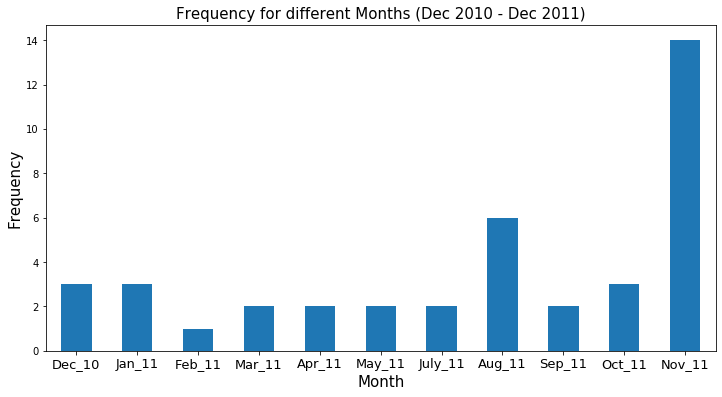

In [41]:
ax = df_new.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

## 15. How much money spent by each country?

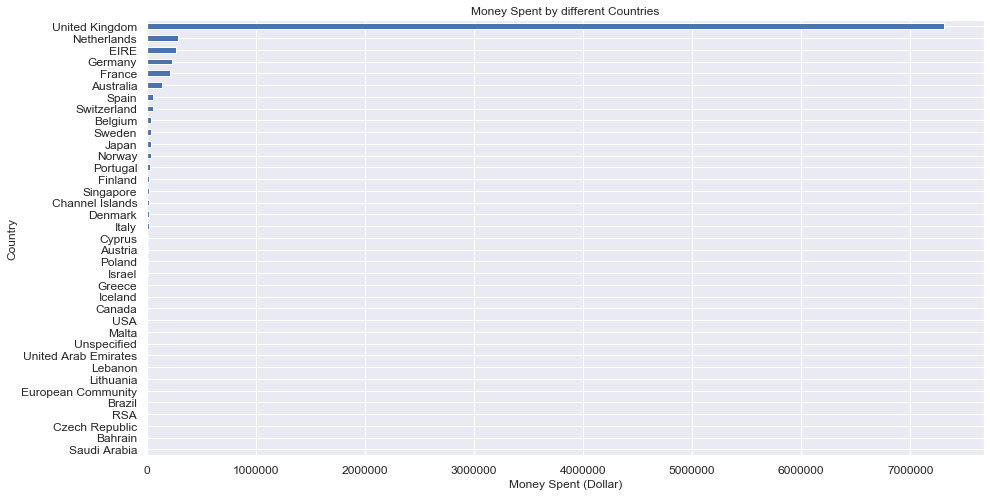

In [225]:
group_country_amount_spent= df2.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, )
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## 1. Perform Basic EDA
    
    
    

## a. Boxplot – All Numeric Variables

In [226]:
df2.describe()

,year_month,quantity,month,day,hour,unit_price,cust_id,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,201101.038417,13.021823,7.612537,3.614555,12.728247,3.116174,15294.315171,22.394749
std,23.836517,180.420210,3.416527,1.928274,2.273535,22.096788,1713.169877,309.055588
min,201012.000000,1.000000,1.000000,1.000000,6.000000,0.000000,12346.000000,0.000000
25%,201104.000000,2.000000,5.000000,2.000000,11.000000,1.250000,13969.000000,4.680000
50%,201107.000000,6.000000,8.000000,3.000000,13.000000,1.950000,15159.000000,11.800000
75%,201110.000000,12.000000,11.000000,5.000000,14.000000,3.750000,16795.000000,19.800000
max,201112.000000,80995.000000,12.000000,7.000000,20.000000,8142.750000,18287.000000,168469.600000


In [227]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  object        
 1   stock_code    397924 non-null  object        
 2   year_month    397924 non-null  int64         
 3   description   397924 non-null  object        
 4   quantity      397924 non-null  int64         
 5   invoice_date  397924 non-null  datetime64[ns]
 6   month         397924 non-null  int64         
 7   day           397924 non-null  int64         
 8   hour          397924 non-null  int64         
 9   unit_price    397924 non-null  float64       
 10  cust_id       397924 non-null  int64         
 11  country       397924 non-null  object        
 12  amount_spent  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 42.5+ MB


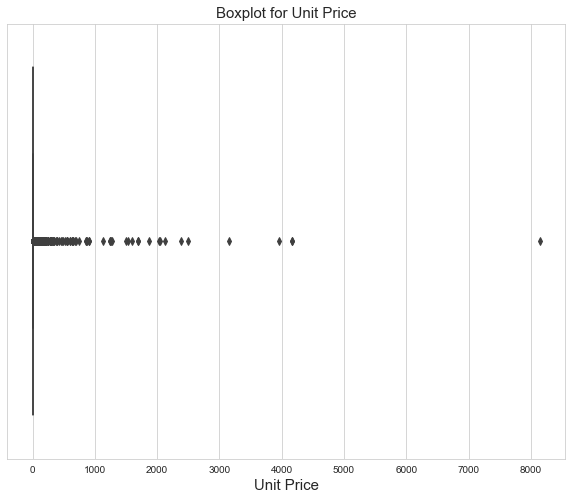

In [50]:
plt.subplots(figsize=(10,8))
sns.boxplot(x="unit_price",data=df2)
plt.xlabel('Unit Price',fontsize=15)
plt.title('Boxplot for Unit Price',fontsize=15)
plt.show()


#df2[['year_month','month','day','hour','quantity','unit_price','amount_spent']].plot.box()

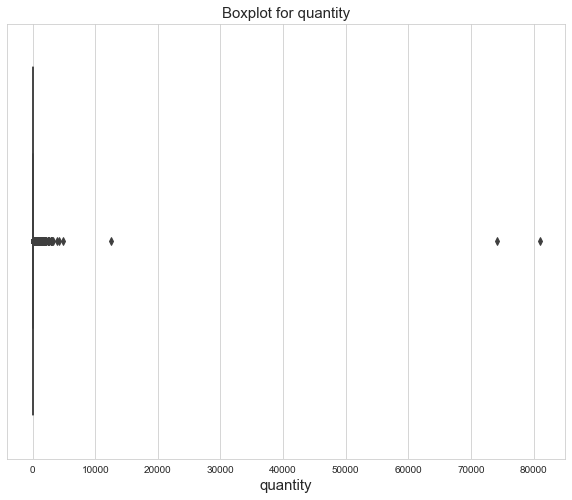

In [49]:
plt.subplots(figsize=(10,8))
sns.boxplot(x='quantity',data=df2)
plt.xlabel('quantity',fontsize=15)
plt.title('Boxplot for quantity',fontsize=15)
plt.show()

## b. Histogram – All Numeric Variables

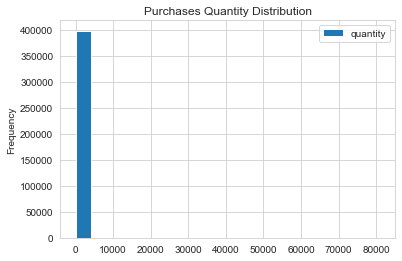

In [53]:
df2[['quantity']].plot.hist(bins = 20, title = 'Purchases Quantity Distribution')


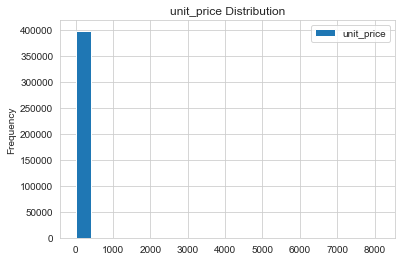

In [55]:
df2[['unit_price']].plot.hist(bins = 20, title = 'unit_price Distribution')

## c. Distribution Plot – All Numeric Variables

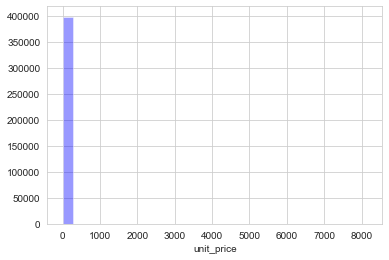

In [46]:
sns.set_style('whitegrid') 
sns.distplot(df2['unit_price'],kde = False, color ='blue', bins = 30)

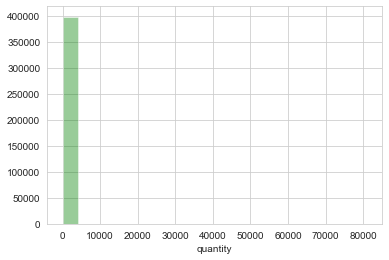

In [45]:
sns.set_style('whitegrid') 
sns.distplot(df2['quantity'] ,kde = False, color ='green', bins = 20)

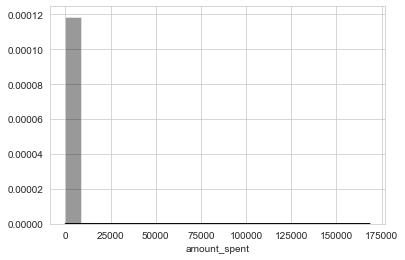

In [47]:
sns.set_style('whitegrid') 
sns.distplot(df2['amount_spent'],color ='black', bins = 20)

## d. Aggregation for all numerical Columns

In [48]:
df2.aggregate({"quantity":['sum', 'min','max'],  
              "unit_price":['min', 'sum','max'],  
              "amount_spent":['sum','max','min']}) 

,quantity,unit_price,amount_spent
max,80995,8142.750,168469.600
min,1,0.000,0.000
sum,5181696,1240000.614,8911407.904


## e. Unique Values across all columns

In [49]:
df2.nunique()

invoice_num     18536
stock_code       3665
year_month         13
description      3877
quantity          302
invoice_date    17286
month              12
day                 6
hour               15
unit_price        441
cust_id          4339
country            37
amount_spent     2940
dtype: int64

## f. Duplicate values across all columns

In [50]:
df2.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397924, dtype: bool

## g. Correlation – Heatmap - All Numeric Variables

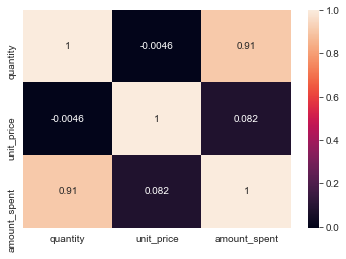

In [52]:
corr = df2[['quantity','unit_price','amount_spent']].corr()
sns.heatmap(corr,xticklabels='auto',yticklabels='auto',annot=True,fmt='.2g')


## h. Regression Plot - All Numeric Variables

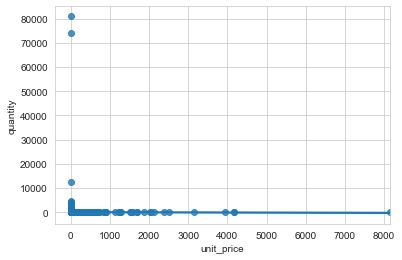

In [53]:
sns.regplot(x='unit_price',y='quantity',data=df2)

## l. Plot the skewness - All Numeric Variables

In [54]:
df2.skew(axis = 0, skipna = True)

invoice_num      -0.178563
year_month       -3.396179
quantity        403.319431
month            -0.444842
day               0.396235
hour              0.189037
unit_price      204.042413
cust_id           0.025776
amount_spent    451.465538
dtype: float64

## j. Pair plot - All Numeric Variables

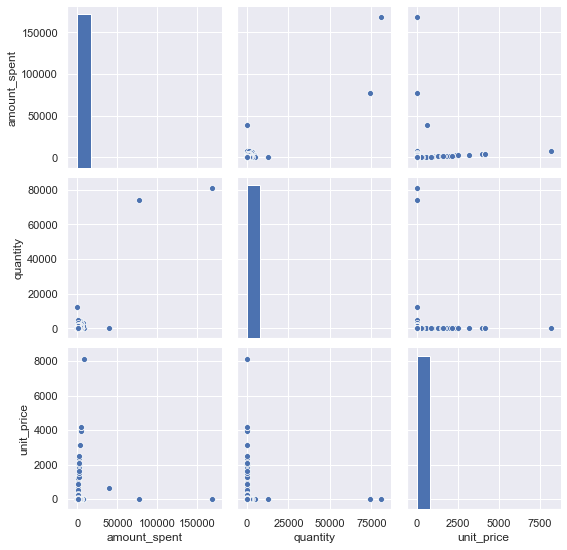

In [265]:
sns.set()
cols = ['amount_spent','quantity','unit_price']
sns.pairplot(df2[cols], size = 2.5)
plt.show();

## i. Bar Plot – Every Categorical Variable vs every Numerical Variable

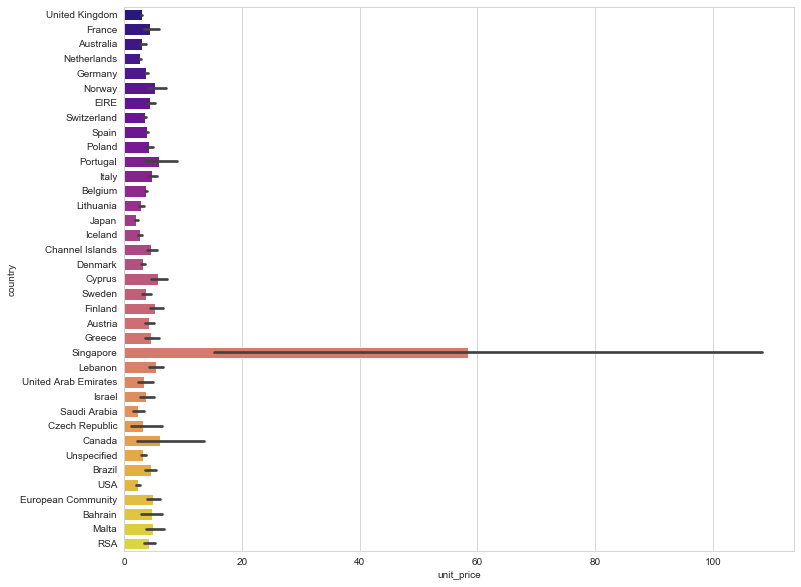

In [63]:
plt.figure(figsize=(12,10))
sns.barplot(x ='unit_price', y ='country', data = df2,palette ='plasma')


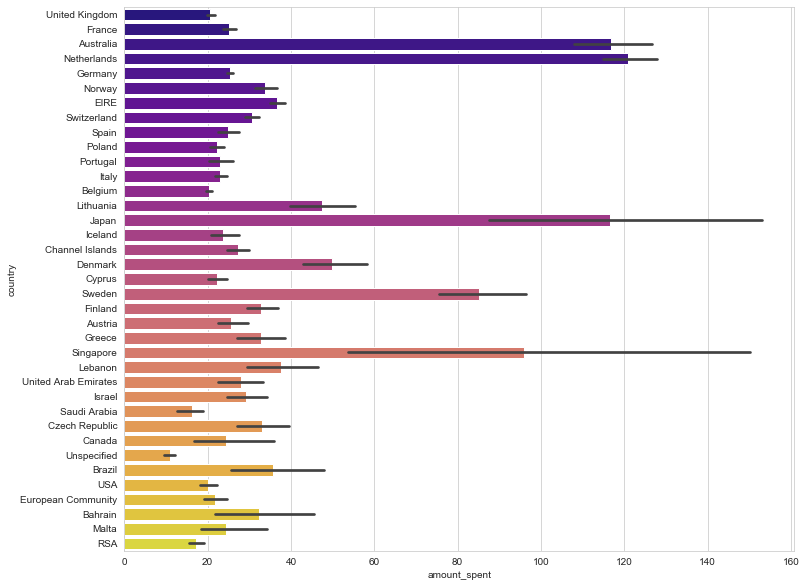

In [66]:
plt.figure(figsize=(12,10))
sns.barplot(x ='amount_spent', y ='country', data = df2,palette ='plasma')

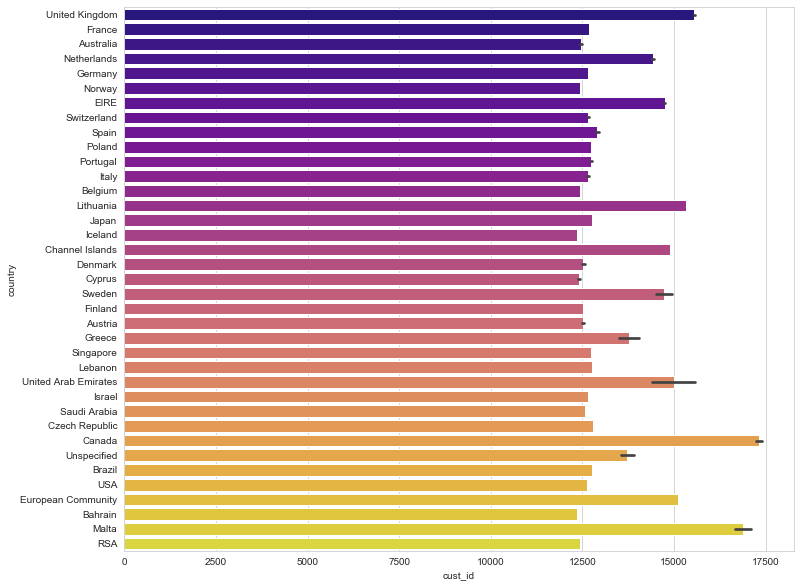

In [67]:
plt.figure(figsize=(12,10))
sns.barplot(x ='cust_id', y ='country', data = df2,palette ='plasma')

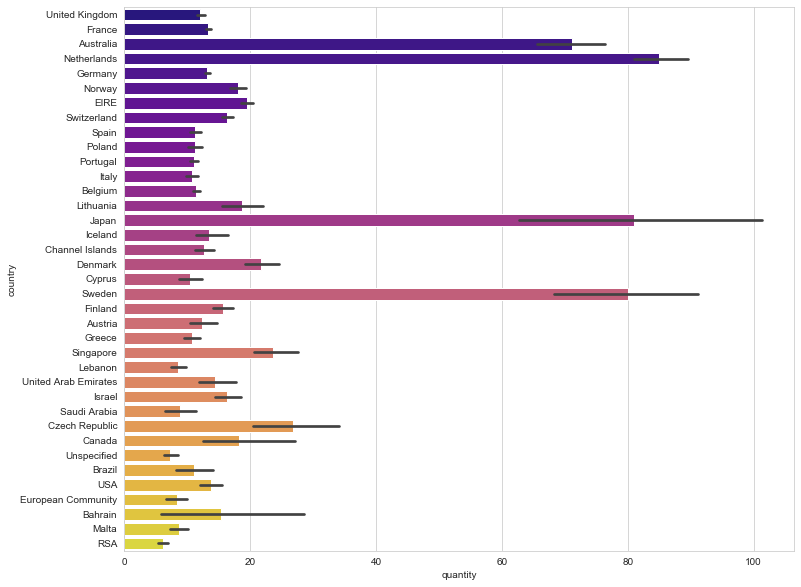

In [55]:
plt.figure(figsize=(12,10))
sns.barplot(x ='quantity', y ='country', data = df2,palette ='plasma')

## k. Line chart to show the trend of data - All Numeric/Date Variables

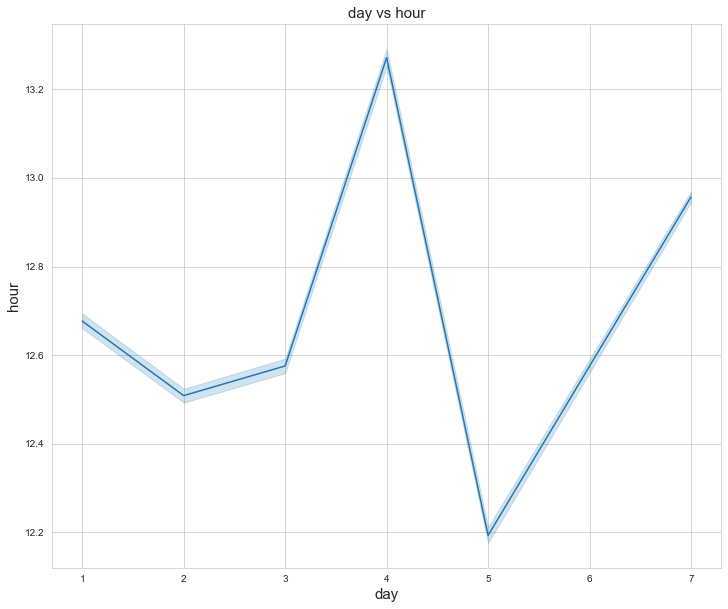

In [61]:
plt.figure(figsize=(12,10))
sns.lineplot(x = "day", y = "hour", data=df2)
plt.xlabel('day',fontsize=15)
plt.ylabel('hour',fontsize=15)
plt.title('day vs hour',fontsize=15)
plt.show()